<a href="https://colab.research.google.com/github/Venkatakousik/FML/blob/main/cnn_on_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Loading the Dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Normalizing the training data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

optimizer = SGD(learning_rate=0.001,momentum=0.9) 
cnn.compile(optimizer='SGD',  # Change optimizer from 'adam' to 'sgd'
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=15)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Load external image for classification


1/1 [==============================] - 0s 20ms/step


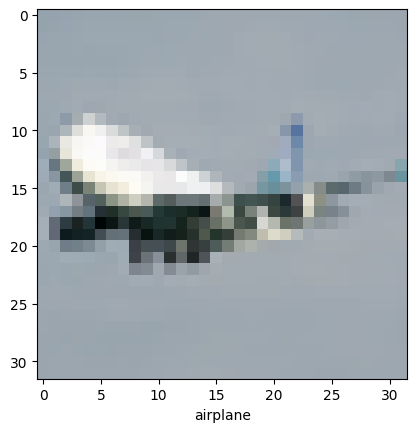

In [13]:
image_path = "/content/drive/MyDrive/cifar10/airplane1.jpg" 
# image_path = "/content/drive/MyDrive/truck.jpg" 
# image_path = "/content/drive/MyDrive/cifar10/horse.jpg" 

# image_path = "/content/drive/MyDrive/cifar10/bird.jpg" 

# image_path = "/content/drive/MyDrive/cifar10/frog.webp"

# image_path = "/content/drive/MyDrive/cifar10/ship.jpg" 


# image_path = "/content/drive/MyDrive/cifar10/deer.jpg" 
 # Replace with the path to your image
image = Image.open(image_path)
image = image.resize((32, 32))  # Resize image to match input shape of the CNN
image = np.array(image)
image = image / 255.0  # Normalize the image pixel values
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Predict class label of the external image
y_pred = cnn.predict(image)
predicted_class_index = np.argmax(y_pred)
predicted_class = classes[predicted_class_index]

# Display the external image and predicted class label
plt.imshow(image.squeeze())
plt.xlabel(predicted_class)
plt.show()